In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Armazendo os dados na variável 'dados'
dados = pd.read_csv('../Dados/supermarket_sales.csv')
dados.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#Traduzindo as colunas do Dataset
dados.rename(columns={'Branch':'Filial', 
                       'City':'Cidade', 
                       'Customer type':'Tipo_cliente', 
                       'Gender': 'Genero',
                       'Product line': 'Linha_produto',
                       'Unit price': 'Preco_unitario', 
                       'Quantity':'Quantidade',
                       'Tax 5%': 'Imposto', 
                       'Date': 'Data',
                       'Time': 'Horario', 
                       'Payment': 'Pagamento',
                       'cogs':'CPV',
                       'gross margin percentage': 'Margem_bruta',
                       'gross income': 'Lucro_bruto',
                       'Rating':'Classificação'}, inplace = True)

In [4]:
#Traduzindo as linhas do dataset
dados['Tipo_cliente'].replace({'Member':'Associado'}, inplace = True)
dados['Linha_produto'].replace({'Health and beauty':'Saude e beleza', 'Electronic accessories':'Acessorios eletonicos',
       'Home and lifestyle':'Casa e estilo de vida', 'Sports and travel':'Esporte e viagens', 'Food and beverages':'Alimentos e bebidas',
       'Fashion accessories':'Acessorios de moda'}, inplace = True)
dados['Pagamento'].replace({'Ewallet':'Carteira digital', 'Cash':'Dinheiro', 'Credit card':'Cartao de credito'}, inplace = True)
dados['Genero'].replace({'Female': 'Feminino', 'Male':'Masculino'}, inplace = True)
dados

,Invoice ID,Filial,Cidade,Tipo_cliente,Genero,Linha_produto,Preco_unitario,Quantidade,Imposto,Total,Data,Horario,Pagamento,CPV,Margem_bruta,Lucro_bruto,Classificação
0,750-67-8428,A,Yangon,Associado,Feminino,Saude e beleza,74.69,7,26.1415,548.9715,1/5/2019,13:08,Carteira digital,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessorios eletonicos,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartao de credito,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Associado,Masculino,Saude e beleza,58.22,8,23.2880,489.0480,1/27/2019,20:33,Carteira digital,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Masculino,Esporte e viagens,86.31,7,30.2085,634.3785,2/8/2019,10:37,Carteira digital,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Masculino,Saude e beleza,40.35,1,2.0175,42.3675,1/29/2019,13:46,Carteira digital,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Feminino,Casa e estilo de vida,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Carteira digital,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Associado,Masculino,Alimentos e bebidas,31.84,1,1.5920,33.4320,2/9/2019,13:22,Dinheiro,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Masculino,Casa e estilo de vida,65.82,1,3.2910,69.1110,2/22/2019,15:33,Dinheiro,65.82,4.761905,3.2910,4.1


In [5]:
#Salvandoos dados tratados
dados.to_csv('../Dados/dados_tratados.csv')

## Modelagem dos dados

In [6]:
#Encoding dos dados qualitativos
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder()
colunas = ['Filial','Cidade','Tipo_cliente','Genero','Linha_produto', 'Pagamento']

encoding = make_column_transformer((encoder, colunas), remainder= 'passthrough')
features = dados.drop(columns = ['Invoice ID', 'Data','Horario'])

dados_transf = encoding.fit_transform(features)
dados_transf = pd.DataFrame(dados_transf, columns = encoding.get_feature_names_out())
dados_transf.head()

,onehotencoder__Filial_A,onehotencoder__Filial_B,onehotencoder__Filial_C,onehotencoder__Cidade_Mandalay,onehotencoder__Cidade_Naypyitaw,onehotencoder__Cidade_Yangon,onehotencoder__Tipo_cliente_Associado,onehotencoder__Tipo_cliente_Normal,onehotencoder__Genero_Feminino,onehotencoder__Genero_Masculino,...,onehotencoder__Pagamento_Carteira digital,onehotencoder__Pagamento_Dinheiro,remainder__Preco_unitario,remainder__Quantidade,remainder__Imposto,remainder__Total,remainder__CPV,remainder__Margem_bruta,remainder__Lucro_bruto,remainder__Classificação
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,74.69,7.0,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,15.28,5.0,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,46.33,7.0,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,58.22,8.0,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,86.31,7.0,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [8]:
#Normalização das variáveis

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_norm = scaler.fit_transform(dados_transf)
dados_norm = pd.DataFrame(dados_norm, columns = encoding.get_feature_names_out())
dados_norm.head()

,onehotencoder__Filial_A,onehotencoder__Filial_B,onehotencoder__Filial_C,onehotencoder__Cidade_Mandalay,onehotencoder__Cidade_Naypyitaw,onehotencoder__Cidade_Yangon,onehotencoder__Tipo_cliente_Associado,onehotencoder__Tipo_cliente_Normal,onehotencoder__Genero_Feminino,onehotencoder__Genero_Masculino,...,onehotencoder__Pagamento_Carteira digital,onehotencoder__Pagamento_Dinheiro,remainder__Preco_unitario,remainder__Quantidade,remainder__Imposto,remainder__Total,remainder__CPV,remainder__Margem_bruta,remainder__Lucro_bruto,remainder__Classificação
0,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,0.998002,-0.998002,0.998002,-0.998002,...,1.377879,-0.724148,0.718160,0.509930,0.919607,0.919607,0.919607,-6.128431e-14,0.919607,1.238443
1,-0.717741,-0.704987,1.431356,-0.704987,1.431356,-0.717741,-1.002002,1.002002,0.998002,-0.998002,...,-0.725753,1.380933,-1.525303,-0.174540,-0.987730,-0.987730,-0.987730,-6.128431e-14,-0.987730,1.529527
2,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,-1.002002,1.002002,-1.002002,1.002002,...,-0.725753,-0.724148,-0.352781,0.509930,0.071446,0.071446,0.071446,-6.128431e-14,0.071446,0.248760
3,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,0.998002,-0.998002,-1.002002,1.002002,...,1.377879,-0.724148,0.096214,0.852165,0.675780,0.675780,0.675780,-6.128431e-14,0.675780,0.830927
4,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,-1.002002,1.002002,-1.002002,1.002002,...,1.377879,-0.724148,1.156959,0.509930,1.267125,1.267125,1.267125,-6.128431e-14,1.267125,-0.973790


C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is k

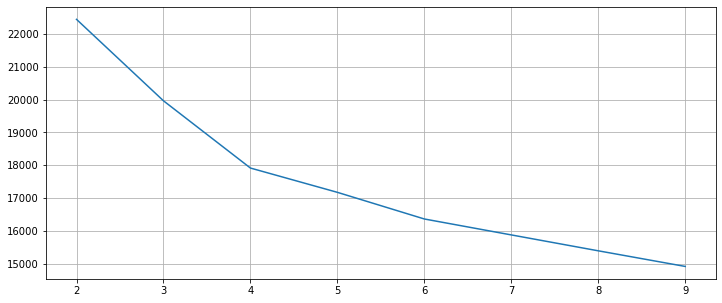

In [10]:
# calculando as distorções e plotando o gráfico de cotovelo
from sklearn.cluster import KMeans
# Criando o laço que irá calcular as distorções
distorcoes = []
n_clusters = range(2, 10)
for cluster in n_clusters:
    distorcoes.append(KMeans(n_clusters= cluster, max_iter = 10_000, n_init= 100, random_state= 7349).fit(dados_norm).inertia_)
    
#Plotando o gráfico

plt.figure(figsize = (12,5))
plt.plot(n_clusters, distorcoes)
plt.grid()

In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def roda_cluster(n_clust, df):
    kmeans = KMeans(n_clusters= n_clust, n_init= 10_000, max_iter= 400)
    y_pred = kmeans.fit_predict(df)
    
    #Métricas
    s = silhouette_score(df, y_pred, metric= 'manhattan')
    calinski = calinski_harabasz_score(df, y_pred)
    dbs = davies_bouldin_score(df, y_pred)
    return s, calinski, dbs

In [14]:
#Testando a estabilidade do modelo com 4 clusters
mod1, mod2, mod3 = np.array_split(dados_norm, 3)
s1, calinski1, dbs1 = roda_cluster(4, mod1)
s2, calinski2, dbs2 = roda_cluster(4, mod2)
s3, calinski3, dbs3 = roda_cluster(4, mod3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.25973533911894986 1.8762137267571442 50.04086620556379
0.2734769605769572 1.8437580851574258 51.30660195634172
0.26234217287861616 1.8698264842591705 51.56305043805916


> As métricas encontradas nos 3 "testes" são bem proximas, o que sugere que existe estabilidade no agrupamento(4 grupos).

In [15]:
#Rodando o modelo
new_kmeans = KMeans(n_clusters= 4, max_iter= 300, n_init= 1_000, random_state=7349)
y = new_kmeans.fit_predict(dados_norm)
y

C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([2, 1, 2, 2, 3, 3, 2, 3, 2, 0, 0, 0, 2, 2, 3, 3, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 3, 3, 2, 1, 1, 2, 3, 1, 0, 0, 1, 0, 3,
       1, 0, 0, 0, 0, 3, 3, 2, 0, 1, 0, 3, 2, 3, 3, 1, 1, 1, 0, 2, 0, 2,
       1, 3, 3, 2, 3, 3, 0, 1, 3, 1, 1, 2, 3, 1, 3, 0, 1, 1, 1, 3, 1, 2,
       2, 0, 1, 1, 2, 3, 1, 2, 3, 1, 2, 0, 1, 3, 1, 2, 0, 3, 1, 2, 1, 3,
       0, 1, 0, 2, 3, 1, 0, 0, 2, 0, 3, 1, 3, 3, 0, 3, 2, 1, 3, 3, 0, 3,
       0, 0, 1, 1, 2, 2, 0, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 2, 0, 1, 3, 1,
       3, 2, 0, 0, 3, 3, 1, 2, 2, 1, 0, 0, 3, 3, 2, 2, 2, 0, 1, 0, 0, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 3, 0, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 0, 2, 3, 1, 0, 3, 2, 3, 0, 0, 0, 2, 0, 2, 3, 0,
       0, 0, 1, 1, 2, 1, 3, 1, 3, 2, 0, 0, 3, 0, 2, 2, 1, 1, 0, 2, 2, 2,
       1, 2, 3, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 3, 1, 0, 2,
       0, 3, 1, 3, 2, 2, 0, 1, 2, 2, 3, 0, 1, 1, 3, 2, 3, 1, 2, 3, 2, 0,
       1, 1, 0, 3, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1,

In [17]:
#Criando uma coluna com esses clusters no Dataset
dados.insert(loc = 17, value = y, column = 'Grupos')
dados.head()

,Invoice ID,Filial,Cidade,Tipo_cliente,Genero,Linha_produto,Preco_unitario,Quantidade,Imposto,Total,Data,Horario,Pagamento,CPV,Margem_bruta,Lucro_bruto,Classificação,Grupos
0,750-67-8428,A,Yangon,Associado,Feminino,Saude e beleza,74.69,7,26.1415,548.9715,1/5/2019,13:08,Carteira digital,522.83,4.761905,26.1415,9.1,2
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessorios eletonicos,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,76.40,4.761905,3.8200,9.6,1
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartao de credito,324.31,4.761905,16.2155,7.4,2
3,123-19-1176,A,Yangon,Associado,Masculino,Saude e beleza,58.22,8,23.2880,489.0480,1/27/2019,20:33,Carteira digital,465.76,4.761905,23.2880,8.4,2
4,373-73-7910,A,Yangon,Normal,Masculino,Esporte e viagens,86.31,7,30.2085,634.3785,2/8/2019,10:37,Carteira digital,604.17,4.761905,30.2085,5.3,3
